In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X,y = make_regression(n_features=1, n_targets=1, n_samples=10, n_informative=1, noise=20, random_state=1)
data=pd.DataFrame({'f1':X[:,0],'target':y})
data.head()

,f1,target
0,-2.301539,-17.633565
1,-0.761207,5.375113
2,-0.528172,-23.653796
3,1.744812,19.378131
4,0.319039,11.549990


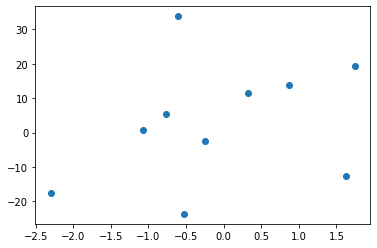

In [3]:
plt.scatter(data['f1'], data['target'])

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(data[['f1']], data['target'])
print(lr.coef_, lr.intercept_)

[4.19734486] 3.1940760375488


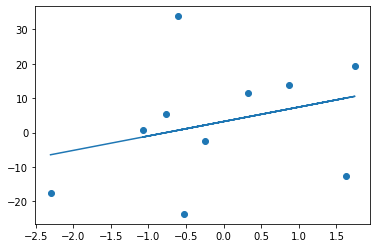

In [6]:
plt.scatter(data['f1'], data['target'])
plt.plot(X,lr.predict(X))

# We are just finding the optimize value of b assuming we already have a best value for m. i.e. 4.197. Our aim is to get the value of 3.19 for b starting with 10

In [7]:
m = 4.197
b = 10

In [8]:
l = -2*np.sum((y - m*X - b)) #slope
l

1361.1914924375433

In [9]:
learning_rate = 0.01

In [10]:
 #The value of learning_rate will say how big our step in every iteration will be. 0.01 is a standard.
step_size = learning_rate*l
step_size

13.611914924375434

In [11]:
new_b = b - (step_size)
new_b

-3.6119149243754336

In [12]:
yhat_first=((m*X.ravel()) + new_b)
yhat_first

array([-13.27147284,  -6.80670029,  -5.82865177,   3.71106005,
        -2.27290784,  -6.17945659,   3.20546257,   0.0202009 ,
        -8.11516423,  -4.65852239])

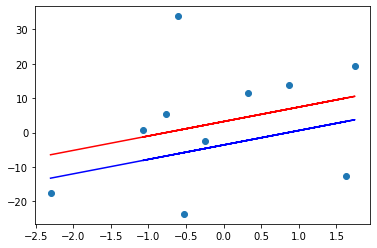

In [13]:
plt.scatter(data['f1'], data['target'])
plt.plot(X,lr.predict(X),color='red') #original best fit line for the data
plt.plot(X,yhat_first,color='blue')

In [14]:
l = -2 * (np.sum((y - m*X - new_b))) #slope
l

-1361.1914924375437

In [15]:
step_size = learning_rate*l
step_size

-13.611914924375437

In [16]:
new_b_t = new_b - (step_size)
new_b_t

10.000000000000004

In [17]:
yhat_s=((m*X.ravel()) + new_b_t)
yhat_s 

array([ 0.34044209,  6.80521464,  7.78326316, 17.32297497, 11.33900709,
        7.43245833, 16.81737749, 13.63211582,  5.49675069,  8.95339253])

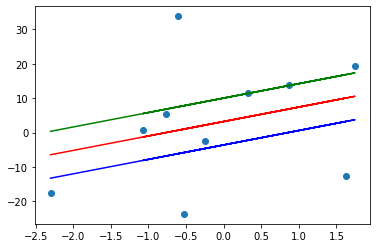

In [18]:
plt.scatter(data['f1'], data['target'])
plt.plot(X,lr.predict(X),color='red') #original best fit line for the data
plt.plot(X,yhat_first,color='blue')
plt.plot(X,yhat_s,color='green')

In [19]:
l = -2 * (np.sum((y - m*X - new_b_t))) #slope
l

1361.1914924375437

In [20]:
step_size = learning_rate*l
step_size

13.611914924375437

In [21]:
new_b_u = new_b - (step_size)
new_b_u

-17.22382984875087

In [22]:
yhat_t=((m*X.ravel()) + new_b_u)
yhat_t

array([-26.88338776, -20.41861521, -19.44056669,  -9.90085487,
       -15.88482276, -19.79137152, -10.40645236, -13.59171403,
       -21.72707916, -18.27043731])

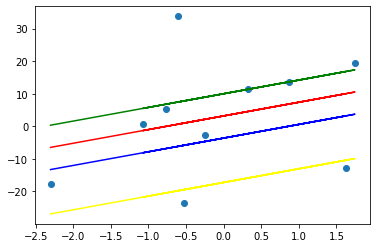

In [23]:
plt.scatter(data['f1'], data['target'])
plt.plot(X,lr.predict(X),color='red') #original best fit line for the data
plt.plot(X,yhat_first,color='blue')
plt.plot(X,yhat_s,color='green')
plt.plot(X,yhat_t,color='yellow')